In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

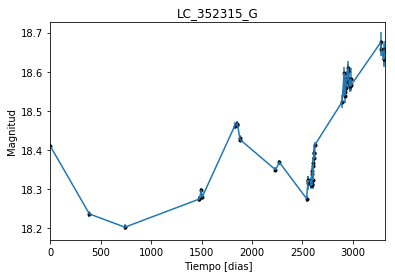

In [2]:
data = np.genfromtxt('LC_352315_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_352315_G')
plt.savefig("LC_352315_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

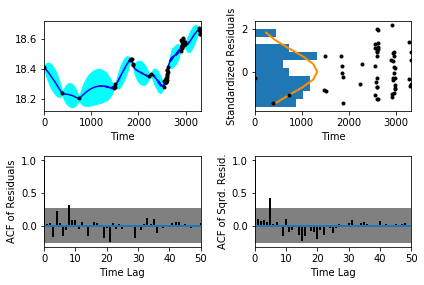

In [5]:
sample.assess_fit()

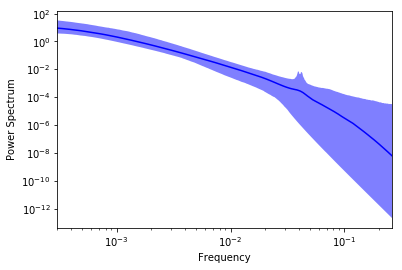

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

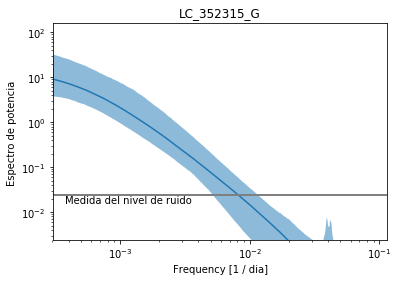

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_352315_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_352315_G')

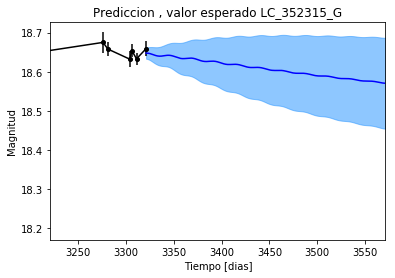

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_352315_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_352315_G')

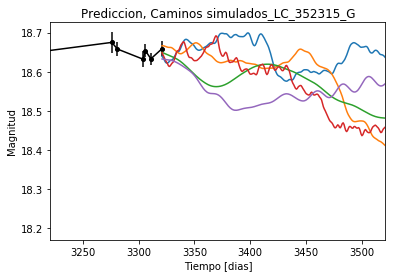

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_352315_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


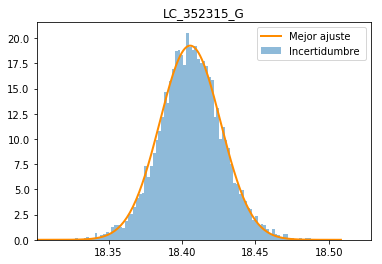

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_352315_G')
plt.savefig("Mejor_ajuste_LC_352315_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_352315_G')

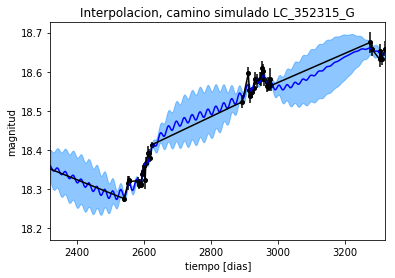

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_G')

Text(0.5,1,'Interpolacion, camino simulado LC_352315_G')

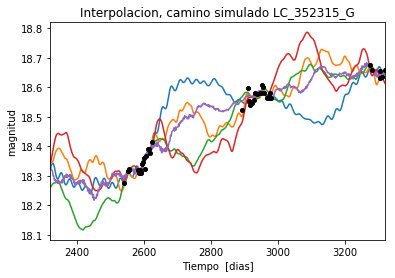

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 251.20956085
Median: 0.01881030698
Standard deviation: 0.10940222781
68% credibility interval: [ 0.0012217   0.14825541]
95% credibility interval: [  3.76199364e-04   4.23314642e-01]
99% credibility interval: [  3.07070275e-04   4.95983513e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 254.44438764
Median: 0.00701213601684
Standard deviation: 0.0576209138425
68% credibility interval: [ 0.00049083  0.04838668]
95% credibility interval: [ 0.00032008  0.21973224]
99% credibility interval: [  3.04198581e-04   3.62616422e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 812.085196635
Median: 0.0226131316686
Standard devia

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 582.745024024
Median: 142.622397587
Standard deviation: 2.06066563754
68% credibility interval: [ 140.34697531  144.13440639]
95% credibility interval: [ 137.35168346  145.41070629]
99% credibility interval: [ 135.16183472  146.82238658]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 513.921615472
Median: 0.516945194734
Standard deviation: 1.35720511884
68% credibility interval: [ 0.05984594  2.69321258]
95% credibility interval: [ 0.01913654  4.49866768]
99% credibility interval: [ 0.01402094  5.93399743]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 205.276663325
Median: 0.739035758565
Standard deviation: 2.98035936856
68% credibility interval: [ 0.07073014  4.22693092]
95% credibility interval: [  0.01714518  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4776.2931025
Median: 4.05913924355e-37
Standard deviation: 2.89559746913e+136
68% credibility interval: [  3.73415722e-64   9.65918937e-14]
95% credibility interval: [  2.06557278e-93   2.63864809e-03]
99% credibility interval: [  7.38182795e-135   1.28358287e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1635.70262523
Median: 18.3938149194
Standard deviation: 0.0679582974703
68% credibility interval: [ 18.33261774  18.45841835]
95% credibility interval: [ 18.26254384  18.53452847]
99% credibility interval: [ 18.20872418  18.59029723]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 173.502537937
Median: 0.0441575662635
Standard deviation: 0.140706227974
68% credibility interval: [ 0.          0.26968323]
95% credibility interval: [ 0.         0.4853195]
99% credibility interval: [ 0.          0.51621683]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 173.502537937
Median: 0.0441575662635
Standard deviation: 0.140706227974
68% credibility interval: [ 0.          0.26968323]
95% credibility interval: [ 0.         0.4853195]
99% credibility interval: [ 0.          0.51621683]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 519.432701412
Median: 0.0
Standard deviation: 0.000196363154667
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 582.745024024
Median: 142.622397587
Standard deviation: 2.06066563754
68% credibility interval: [ 140.34697531  144.13440639]
95% credibility interval: [ 137.35168346  145.41070629]
99% credibility interval: [ 135.16183472  146.82238658]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 802.738935093
Median: 0.0181959998928
Standard deviation: 0.0162658557374
68% credibility interval: [ 0.01213925  0.03028652]
95% credibility interval: [ 0.00861173  0.05657878]
99% credibility interval: [ 0.00718236  0.10460451]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1548.43306463
Median: 1.00904840389
Standard deviation: 0.184410614128
68% credibility interval: [ 0.84614063  1.20319232]
95% credibility interval: [ 0.71827248  1.43551197]
99% credibility interval: [ 0.64585044  1.61793483]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 167.00968342
Median: 0.000611809350723
Standard deviation: 0.0211870287341
68% credibility interval: [  2.37603460e-05   6.06998094e-03]
95% credibility interval: [  3.16355847e-06   4.74805507e-02]
99% credibility interval: [  1.08595073e-06   1.63258604e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 251.20956085
Median: (-0.118188644441-0.239462581911j)
Standard deviation: 1.11987251359
68% credibility interval: [-0.93151623+0.j         -0.00767616-0.68830037j]
95% credibility interval: [ -2.65976434e+00-2.79526052j  -2.36373032e-03-0.2816331j ]
99% credibility interval: [ -3.11635632e+00+0.j          -1.92937944e-03-0.24839395j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 254.44438764
Median: (-0.044058549993+1.04689365121j)
Standard deviation: 0.955341999096
68% credibility interval: [-0.30402248+0.35326095j -0.00308400+0.j        ]
95% credibility interval: [-1.38061840+2.11595842j -0.00201113+0.28096973j]
99% credibility interval: [ -2.27838617e+00+2.13159461j  -1.91133605e-03+0.j        ]
Posterior summar